# Phase 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data from CSV files
literacy_data = pd.read_csv("C:\\Users\\h473401\\State wise Data.csv")
crime_data = pd.read_csv("C:\\Users\\h473401\\01_District_wise_crimes_committed_IPC_2001_2012.csv")

In [3]:
merged_data = pd.merge(literacy_data, crime_data, on='State', how='inner')

In [5]:
merged_data

,State,Population,Increase,Area(Km2),Density,Sex-Ratio,Literacy,DISTRICT,YEAR,MURDER,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,UTTAR PRADESH,"199,812,341",20.23%,"240,928",829,912,67.68,AGRA,2001,153,...,14,518,63,110,114,327,0,234,2085,6662
1,UTTAR PRADESH,"199,812,341",20.23%,"240,928",829,912,67.68,ALIGARH,2001,229,...,32,446,44,90,54,258,0,189,1134,4688
2,UTTAR PRADESH,"199,812,341",20.23%,"240,928",829,912,67.68,ALLAHABAD,2001,167,...,38,1024,56,85,105,226,0,215,2052,6096
3,UTTAR PRADESH,"199,812,341",20.23%,"240,928",829,912,67.68,AMBEDKAR NAGAR,2001,46,...,13,244,14,15,9,87,0,38,447,1379
4,UTTAR PRADESH,"199,812,341",20.23%,"240,928",829,912,67.68,AURAIYA,2001,53,...,13,247,21,13,7,26,0,82,321,1137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,"64,473",6.30%,30,"2,149",946,91.85,TOTAL,2010,0,...,2,1,0,0,0,0,0,0,26,42
9013,LAKSHADWEEP,"64,473",6.30%,30,"2,149",946,91.85,LAKSHADWEEP,2011,0,...,3,3,0,0,0,0,0,0,27,44
9014,LAKSHADWEEP,"64,473",6.30%,30,"2,149",946,91.85,TOTAL,2011,0,...,3,3,0,0,0,0,0,0,27,44
9015,LAKSHADWEEP,"64,473",6.30%,30,"2,149",946,91.85,LAKSHADWEEP,2012,0,...,3,3,0,1,0,1,0,0,32,60


In [6]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9017 entries, 0 to 9016
Data columns (total 39 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   State                                                9017 non-null   object 
 1   Population                                           9017 non-null   object 
 2   Increase                                             9017 non-null   object 
 3   Area(Km2)                                            9017 non-null   object 
 4   Density                                              9017 non-null   object 
 5   Sex-Ratio                                            9017 non-null   int64  
 6   Literacy                                             9017 non-null   float64
 7   DISTRICT                                             9017 non-null   object 
 8   YEAR                                                 9017 non-null  

2.1 Analysis of Literacy Rate vs Total Crimes

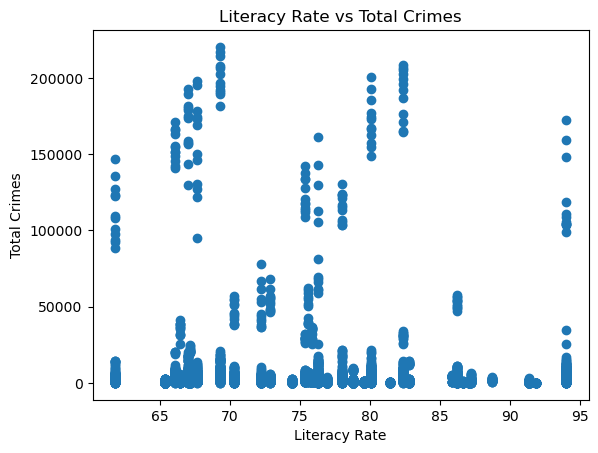

In [7]:

plt.scatter(merged_data['Literacy'], merged_data['TOTAL IPC CRIMES'])
plt.title('Literacy Rate vs Total Crimes')
plt.xlabel('Literacy Rate')
plt.ylabel('Total Crimes')
plt.show()

2.2 Analysis of the type of crime vs each state vs Literacy rate

In [8]:
correlation_murder = merged_data['Literacy'].corr(merged_data['MURDER'])
correlation_rape = merged_data['Literacy'].corr(merged_data['RAPE'])

print(f'Correlation with Murder: {correlation_murder}')
print(f'Correlation with Rape: {correlation_rape}')


Correlation with Murder: -0.06803239429076602
Correlation with Rape: -0.030595299902276742


In [10]:
crime_subset = merged_data[['State', 'Literacy', 'MURDER', 'RAPE', 'THEFT']]

In [11]:
crime_subset

,State,Literacy,MURDER,RAPE,THEFT
0,UTTAR PRADESH,67.68,153,66,1181
1,UTTAR PRADESH,67.68,229,50,727
2,UTTAR PRADESH,67.68,167,42,850
3,UTTAR PRADESH,67.68,46,19,116
4,UTTAR PRADESH,67.68,53,11,82
...,...,...,...,...,...
9012,LAKSHADWEEP,91.85,0,0,5
9013,LAKSHADWEEP,91.85,0,0,4
9014,LAKSHADWEEP,91.85,0,0,4
9015,LAKSHADWEEP,91.85,0,0,7


In [ ]:
# 

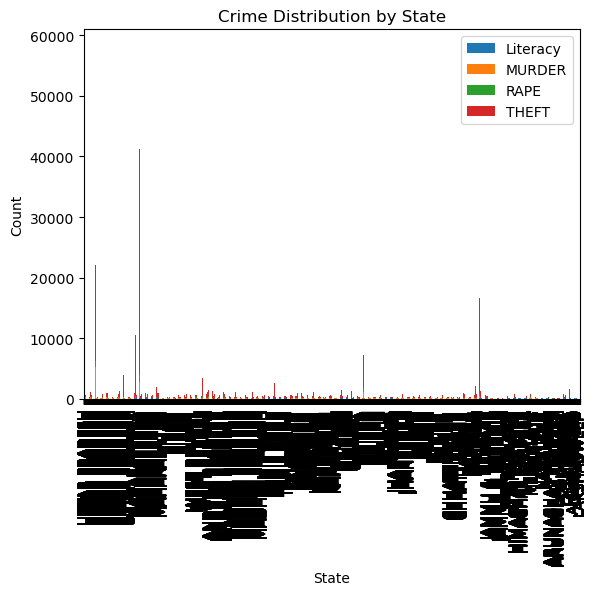

In [13]:
# Bar plot
crime_subset.set_index('State').plot(kind='bar', stacked=True)
plt.title('Crime Distribution by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

2.3 Analysis of year-on-year total crime rate.

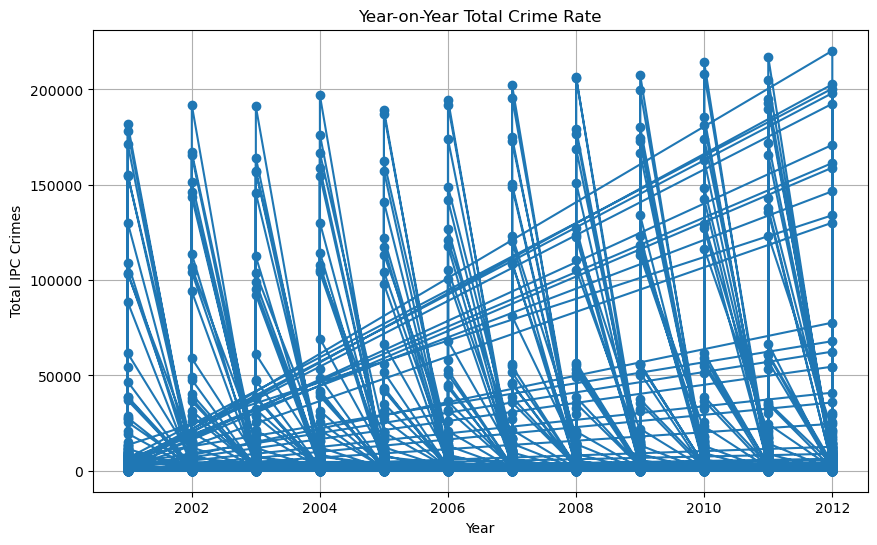

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(merged_data['YEAR'], merged_data['TOTAL IPC CRIMES'], marker='o')
plt.title('Year-on-Year Total Crime Rate')
plt.xlabel('Year')
plt.ylabel('Total IPC Crimes')
plt.grid(True)
plt.show()

2.4 Analysis of area vs overall crime

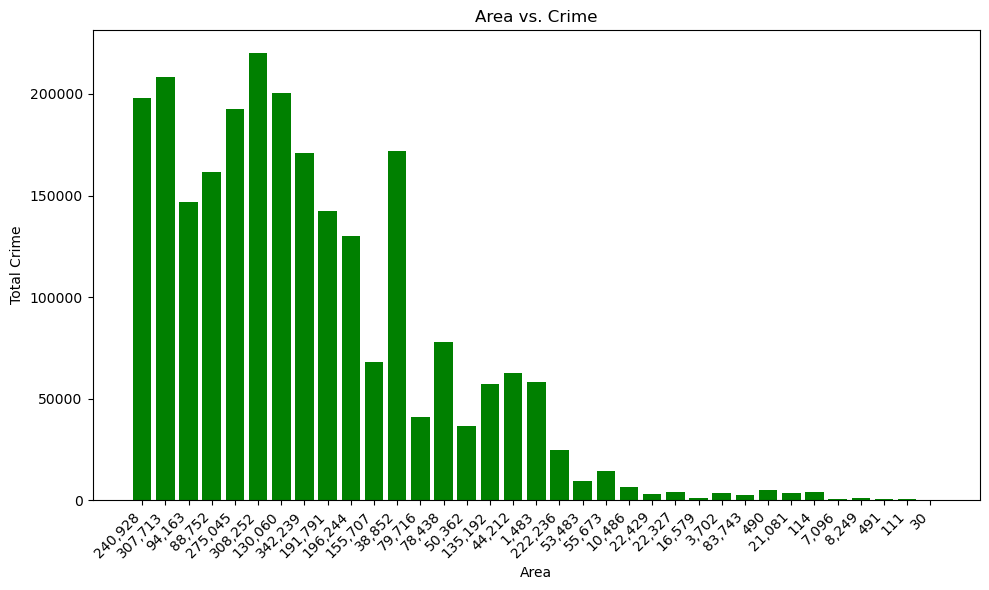

In [19]:
# Analysis of area vs overall crime
plt.figure(figsize=(10, 6))
plt.bar(merged_data['Area(Km2)'], merged_data['TOTAL IPC CRIMES'], color='green')
plt.xlabel('Area')
plt.ylabel('Total Crime')
plt.title('Area vs. Crime')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

2.5 Analysis of Population vs overall Crime

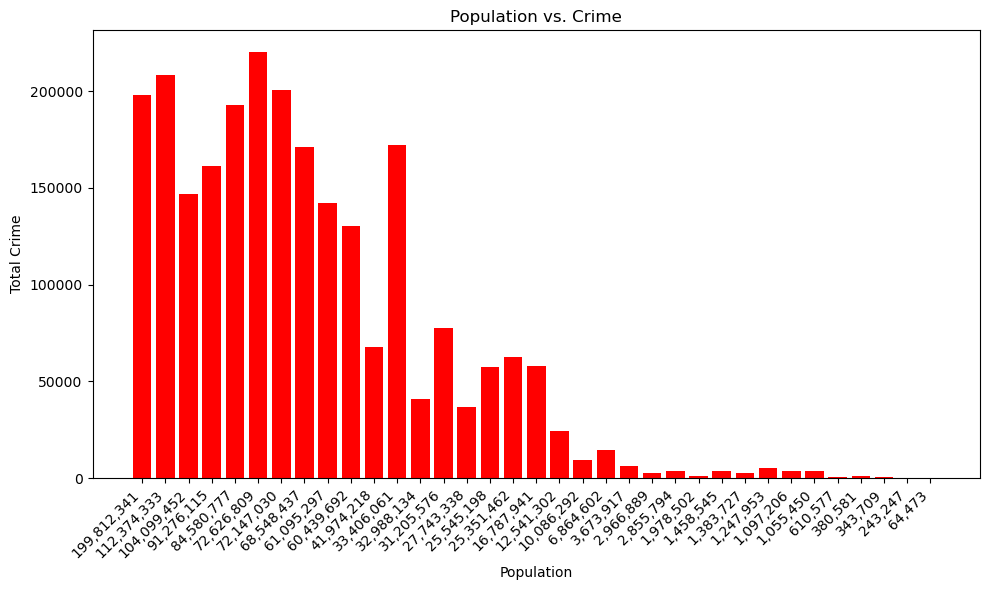

In [20]:
# Analysis of area vs overall crime
plt.figure(figsize=(10, 6))
plt.bar(merged_data['Population'], merged_data['TOTAL IPC CRIMES'], color='red')
plt.xlabel('Population')
plt.ylabel('Total Crime')
plt.title('Population vs. Crime')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better spacing
plt.show()